In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8-dark-palette')



# CoderHouse - Data Science

#### Desafio Evaluacion ML - Marco Ormello - Comision: 32845 

### Abstract

##### El presente trabajo tiene como objetivo realizar un análisis de los datos contenidos en un dataset que muestra la relación entre los hábitos de consumo de alcohol y tabaco, la situación socioeconómica y los gustos culinarios de una muestra de personas. 
##### La motivación de este estudio es conocer las variables que influyen en los gustos gastronómicos y el rating que otorgan a diferentes platos.
##### La elección de este dataset se basó en la relevancia del tema de estudio y la disponibilidad de información detallada y estructurada. Además, se espera que los resultados obtenidos puedan ser útiles para comprender mejor las preferencias gastronómicas de diferentes grupos socioculturales y económicos, y así ayudar a la industria de la alimentación y bebidas en la toma de decisiones comerciales.
##### La audiencia a la que está orientado este análisis son aquellas entidades relacionadas con la industria gastronómica, tales como restaurantes, bares y cafeterías, así como también empresas de catering. Estas entidades podrían verse beneficiadas al obtener una aproximacion a poder predecir las tendencias gastronómicas de sus clientes potenciales, según las propiedades analizadas en este estudio. Por ejemplo, si se sabe que las personas menores de 30 años prefieren la comida japonesa, un restaurante podría enfocar su oferta en este tipo de comida y así atraer a más clientes jóvenes.
##### Inicialmente, se realiza un análisis general de la muestra, en el que se evidencia que predominan los varones menores de 30 años, y en su mayoría, estudiantes. Además, se observa que la media de bebedores es mayor que la de fumadores, y se encuentra una tendencia en el aumento de ambos hábitos según la edad. A partir de estos resultados, se plantea una hipótesis que indica que existen factores socioculturales, económicos y hábitos de vida que permiten clasificar a las personas y predecir sus gustos culinarios.
##### Se realiza una primera aproximación para evaluar la relación entre los factores socioculturales y los gustos gastronómicos. Se evidencia que las personas de mayor edad prefieren la comida italiana, mientras que los jóvenes prefieren la japonesa. Asimismo, se observa que los fumadores habituales prefieren la comida japonesa, los sociales la comida india y los no fumadores la filipina. En cuanto al consumo de alcohol, se observa que los que consumen alcohol prefieren la comida filipina y los que no consumen alcohol prefieren la comida japonesa.
##### Se encuentra un patrón interesante al analizar la situación económica de los encuestados, ya que la media de budget es mayor para la comida japonesa, pero las personas están dispuestas a dedicar un budget mayor para la comida italiana, aunque lo hacen con menor frecuencia. También se observa que las personas divorciadas suelen dar en general mejores puntajes en las valoraciones culinarias.
##### En conclusión, este estudio muestra la relación entre los hábitos de consumo, la situación socioeconómica y los gustos culinarios de una muestra de personas. Los resultados obtenidos permiten establecer patrones y relaciones entre las variables analizadas, lo que puede ser de gran utilidad para el desarrollo de estrategias de marketing en el sector gastronómico.

### Definición de objetivo: 
##### El objetivo de este trabajo es conocer las propiedades de diferentes grupos poblacionales y dar las directrices para especializarse en una oferta de cocina que los atraiga. Al adaptarse a las preferencias de los clientes potenciales, los establecimientos gastronómicos pueden aumentar su rentabilidad y adquirir ventajas competitivas en determinado mercado al que se dirigen.

### Contexto comercial: 
##### Los establecimientos gastronomicos operan en un mercado altamente competitivo en constante busqueda de formas de aumentar sus ventas y mejorar su rentabilidad frente la abundancia y variedad de propuestas disponibles en el rubro.

### Problema Comercial: 
##### Adecuar las caracteristicas del negocio para captar la atencion del consumidor en un mercado altamente competitivo.

### Contexto analítico: 
##### Para abordar este problema comercial, se utilizará un enfoque analítico que involucra la recopilación y el análisis de datos de ventas, datos socioculturales y datos de comportamiento de los clientes. Se utilizarán técnicas de análisis estadístico y de minería de datos para identificar patrones y tendencias en los datos y para identificar oportunidades de mejora en el rendimiento de la empresa.

### Restaurant's cuisine ratings

##### El siguiente dataset contiene informacion de la situacion sociocultural y habitos de consumo de alcohol y tabaco de una muestra de personas y su relacion con la puntuacion que otorgaron a platos de diferentes categorias.

In [2]:
df = pd.read_csv('/workspaces/data-science/data/raw/Cuisine_rating.csv')
df

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### Limpieza de Datos

#### Nulls y Duplicados

In [3]:
print(df.isna().sum().sort_values())
print('Duplicados: ' ,df.duplicated().sum())

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64
Duplicados:  0


#### Data types

In [4]:
df.dtypes

User ID             int64
Area code           int64
Location           object
Gender             object
YOB                 int64
Marital Status     object
Activity           object
Budget              int64
Cuisines           object
Alcohol            object
Smoker             object
Food Rating         int64
Service Rating      int64
Overall Rating    float64
Often A S          object
dtype: object

### Datos de tipo:

#### Categorico:

In [5]:
categoric_col = []
for col in df.columns:
	if (df[col].nunique()<10) and (df[col].dtype=="object"):
		categoric_col.append(col) 
  
print("Columnas con datos categoricos {}".format(categoric_col))

Columnas con datos categoricos ['Gender', 'Marital Status', 'Activity', 'Cuisines', 'Alcohol ', 'Smoker', 'Often A S']


#### Continuo:

In [6]:
Numeric=list(set(df.columns)- set(categoric_col))
print("Columnas con datos continuos {}".format(Numeric))

Columnas con datos continuos ['Overall Rating', 'Location', 'User ID', 'Area code', 'YOB', 'Service Rating', 'Budget', 'Food Rating']


#### Conteo de Variables unicas:

In [7]:
df.nunique().sort_values()

Gender              2
Activity            2
Often A S           2
Marital Status      3
Alcohol             3
Smoker              3
Budget              5
Food Rating         5
Service Rating      5
Cuisines            7
Overall Rating      9
Location           10
YOB                46
Area code          65
User ID           200
dtype: int64

##### Reemplazamos la columna "YOB" por la edad de los participantes y la llamamos "Age"

In [8]:

now = datetime.datetime.now()
df['Age'] = now.year - df['YOB']
df = df.drop('YOB', axis=1)
df.head(5)

,User ID,Area code,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,1,153,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,17
1,2,123,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,32
2,3,122,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,46
3,4,153,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,67
4,5,129,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,26


##### Eliminamos columnas que no poseen informacion relevante a para el modelo.

In [9]:
df.drop(labels=["User ID", "Area code", "Often A S"], axis=1, inplace=True)
df.head(5)

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,17
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,32
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,46
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,67
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,26


##### No se aplica algun metodo de manejo de outliers por no presentar variables numericas donde sea util aplicar esa logica.

### Analisis general de la muestra.

##### Inicialmente haremos un analisis global del dataset para conocer cuales son las caracteristicas de nuestra muestra.

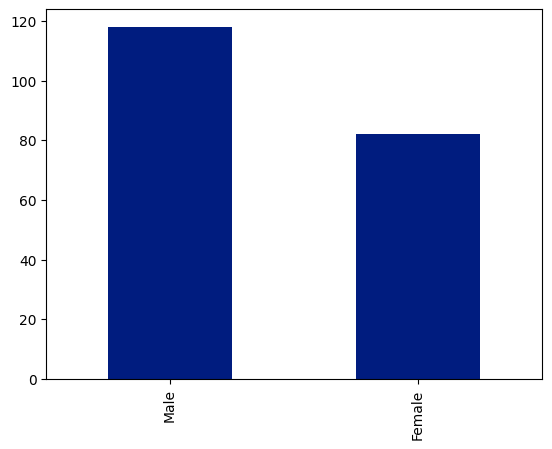

In [10]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()

##### Los integrantes de esta muestra se consideran en su mayoria varones.

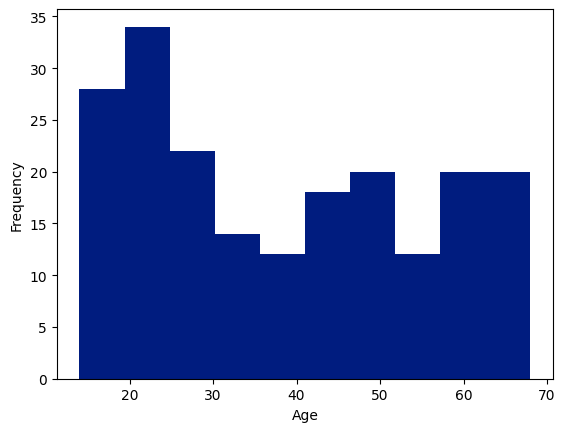

In [11]:
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


##### Predominan las personas menores de 30 años en esta muestra.

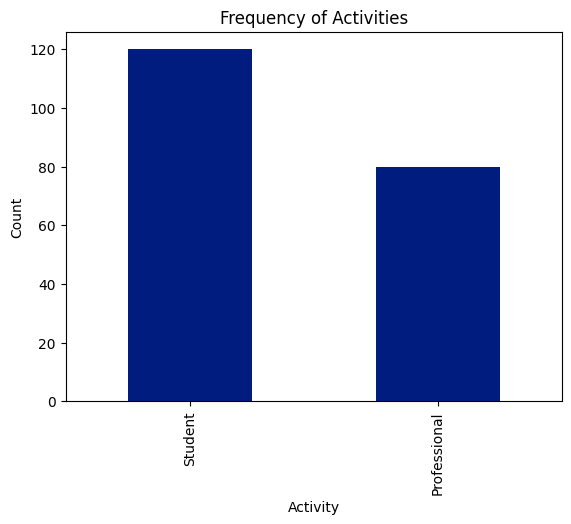

In [12]:
activity_counts = df['Activity'].value_counts()

activity_counts.plot(kind='bar')

plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Frequency of Activities')

plt.show()

##### En su mayoria son estudiantes.

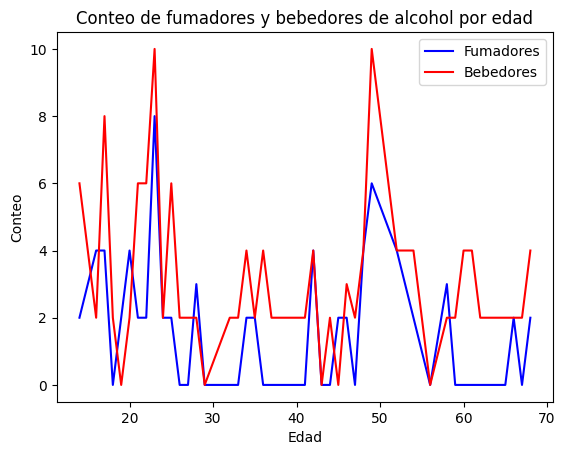

In [13]:
smoker_counts = df.groupby('Age')['Smoker'].apply(lambda x: x[x == 'Often'].count())
alcohol_counts = df.groupby('Age')['Alcohol '].apply(lambda x: x[x != 'Often'].count())


fig, ax = plt.subplots()
ax.plot(smoker_counts.index, smoker_counts.values, color='blue', label='Fumadores')
ax.plot(alcohol_counts.index, alcohol_counts.values, color='red', label='Bebedores')
ax.legend()
ax.set_xlabel('Edad')
ax.set_ylabel('Conteo')
ax.set_title('Conteo de fumadores y bebedores de alcohol por edad')
plt.show()

##### Podemos apreciar que la media de bebedores es mayor que la de fumadores en general a lo largo de los años. Ademas podemos ver una muy interesante una tendencia en el aumento en ambos habitos de consumo segun la edad, habiendo dos picos entre los 20 y los 30 años y entre los 45 a 55 años para fumadores y bebedrores.

### Hipotesis:
##### Existe una relacion entre factores socioculturales, economicos y habitos de vida que sirven para clasificar en grupos a las personas y predecir sus gustos culinarios.

##### Haremos una primera aproximacion para evaluar cuales son los factores socioculturales con mayor relacion a diferentes gustos gastronomicos y al mismo tiempo su influencia en el rating que otorgaron.

#### Edad.

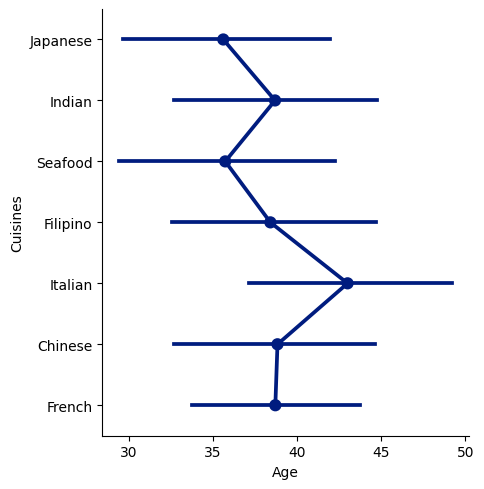

In [14]:

sns.catplot(x='Age', y='Cuisines', kind="point", data=df)


plt.show()

### Que tipo de comida prefieren los mas jovenes y los entrevistado de mayor edad?

##### Este grafico de tipo CatPlot representa la magnitud y el promedio de la contabilizacion de elecciones de preferencias gastronomicas segun la edad del entrevistado. Inicialmente podemos obtener como referencia que las personas de mayor edad prefieren la comida italiana y los mas jovenes prefieren la comida japonesa.

#### Hábitos.

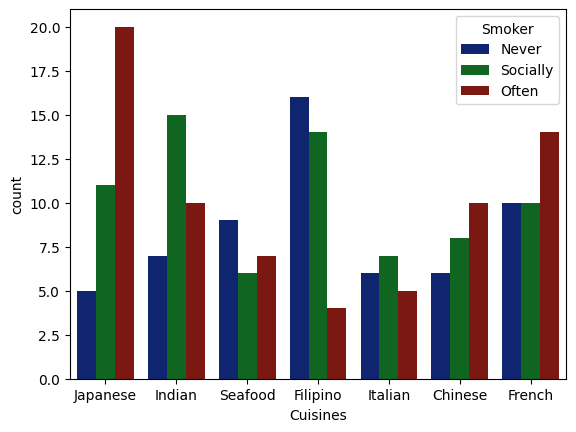

In [15]:
sns.countplot(x='Cuisines', hue='Smoker', data=df)

plt.show()


### El habito de fumar puede relacionarse a un trend en algun plato en particular?

##### Al mismo tiempo podemos observar en este grafico que los fumadores habituales prefieren la comida japonesa, los sociales la comida india y los no fumadores la filipina.

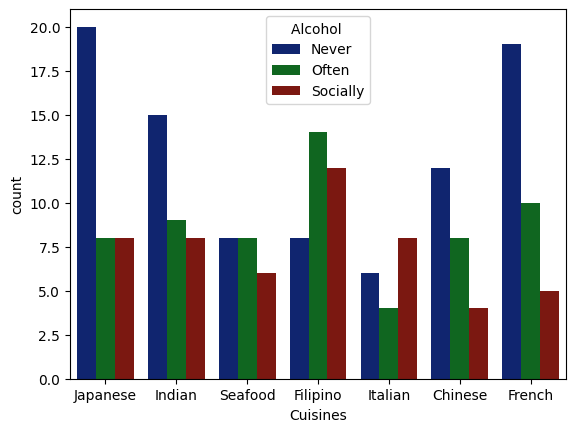

In [16]:
sns.countplot(x='Cuisines', hue='Alcohol ', data=df)

plt.show()

### Analizando habitos de consumo, el alcohol puede influenciar las preferencias culinarias?

##### En este grafico podemos ver que las personas que consumen alcohol, sea de manera social o habitual, prefieren la comida filipina y los que no consumen alocohol prefieren la comida japonesa.
##### Es interesante destacar que los resultador fueron practicamente los opuestos en comparacion a cuando la variable tenida en cuenta es el habito de fumar.

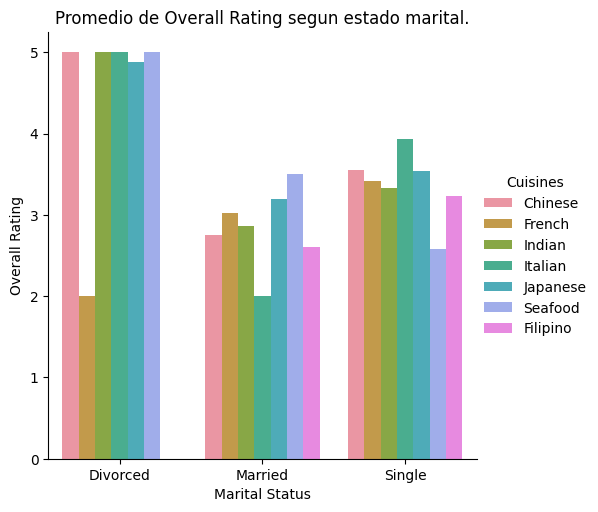

In [17]:
df_grouped = df.groupby(['Marital Status', 'Cuisines'])['Overall Rating'].mean().reset_index(name='mean_rating')

sns.catplot(x='Marital Status', y='mean_rating', hue='Cuisines', kind='bar', data=df_grouped)

plt.xlabel('Marital Status')
plt.ylabel('Overall Rating')
plt.title('Promedio de Overall Rating segun estado marital.')

plt.show()



### El estado civil de la persona puede relacionarse con los puntajes que otorgan de manera prevalente?

##### Este grafico evidencia que las personas divorciadas tienden a dar mayores Overal Ratings, es decir mejores puntuaciones globales, sea cual sea su preferencia gastronomica.

### Influencia economica

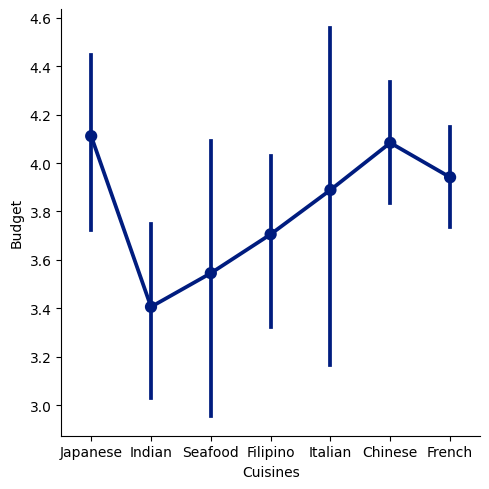

In [18]:
sns.catplot(x='Cuisines', y='Budget', kind="point", data=df)


plt.show()

### Como influencia el poder adquisitivo a los gustos culinarios?

##### La media de budget es mayor para la comida japonesa, pero las personas estan dispuestas a dedicar un budget mayor para la comida italiana, aunque lo hacen con menor frecuencia por lo que la media es menor que la japonesa.

#### Conclusiones

##### En base a este dataframe, es posible realizar un analisis que nos premita encontrar grupos socioeconomicos con caracteristicas particulares que pueden estar relacionados con diferentes tipos de cocina.
##### Podemos ver los siguientes patrones de preferencia segun diferentes variables analizadas:
##### - Las personas de mayor edad prefieren la comida italiana, las de menor la japonesa.
##### - Segun los habitos de consumo analizados, los fumaodres y tomadores de alcohol tienen en general preferencias opuestas, siendo para los consumidores habituales de de tabaco, la comida japonesa la mas preferida, pero para los bebedores, la menos preferida. Lo mismo sucede pero de manera opuesta para la comida filipina, siendo lo mas consumido por los bebedores y lo menos consumido por los fumadores. 
##### - Con respecto al poder adquisitivo, la media de budget es mayor para la comida japonesa, pero las personas estan dispuestas a dedicar un budget mayor para la comida italiana, aunque lo hacen con menor frecuencia por lo que la media es menor que la japonesa.
##### - Las personas divorciadas suelen dar en general mejores puntajes en las valoraciones culinarias, estos llegan a ser de una media de mas del doble con respecto a los solteros y casados.
##### 


#### Recomendaciones basadas en los insights observados

##### Los hallazgos del análisis muestran la importancia de conocer a su grupo objetivo y especializarse en una oferta de cocina que los atraiga. Al adaptarse a las preferencias de los clientes potenciales, los establecimientos gastronómicos pueden aumentar su rentabilidad y adquirir ventajas competitivas en determinado mercado al que se dirigen.
##### Por lo tanto, en base a los insights que otorga este analisis de datos, en el aspecto economico es conveniente destinar recursos en especializarse en la oferta de cocina que atraiga a su grupo objetivo. Si su grupo objetivo es de mayor edad, ofrecer opciones de comida italiana puede ser una estrategia efectiva, mientras que la inclusión de opciones de comida japonesa puede atraer a personas más jóvenes. Al adaptar su oferta de cocina a su grupo objetivo, los establecimientos gastronómicos pueden aumentar su atractivo comercial y establecerse como líderes en su nicho de mercado.

##### Es importante destacar que los hábitos de consumo también influyen en la elección de los clientes potenciales. Por ejemplo, la comida filipina mostro mayor afinidad con los potenciales clientes que habituan el consumo de alcohol, este dato seria de vital importancia para destinar recursos a destacarse en el aspecto de bar o la oferta de tragos y bebidas. Al conocer los hábitos de consumo de su audiencia y ofrecer opciones que se ajusten a sus necesidades, los establecimientos pueden mejorar su rentabilidad y aumentar su participación de mercado.

##### Además, es importante que los establecimientos gastronómicos que se concentren en ofrecer opciones de alta calidad, si bien la media de budget es mayor para la comida japonesa, las personas están dispuestas a dedicar un budget mayor para la comida italiana, aunque lo hacen con menor frecuencia. Por lo tanto, un establecimiento de comida italiana otorga cierto respaldo cultural para buscar caracterizarse por una imagen de tipo premium o de alta cocina. Al ofrecer opciones de alta calidad y ajustar los precios para atraer a su audiencia objetivo, los establecimientos pueden aumentar sus ingresos y mejorar su rentabilidad.

### Modelo

##### Realizamos un proceso de label encoder para nuestro modelo.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfl = df.copy() #Creamos una copia para no sobreescribir las columnas de nuestro DF original.
 
for col in dfl.columns:
    if dfl[col].dtype == 'object':
        dfl[col] = le.fit_transform(dfl[col])

In [20]:
X = dfl.drop(["Cuisines"], axis=1)
y = dfl['Cuisines']

##### Se procede a realizar drop sobre nuestra columna "y" asi como sobre las columnas con iformacion que no es relevante.

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.20 , random_state = 42)

In [22]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((160, 11), (160,), (40, 11), (40,))

#### Arbol de Desicion

In [23]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
clf = DecisionTreeClassifier(random_state=1234,criterion='gini',max_depth=5)

model = clf.fit(X_train, y_train)

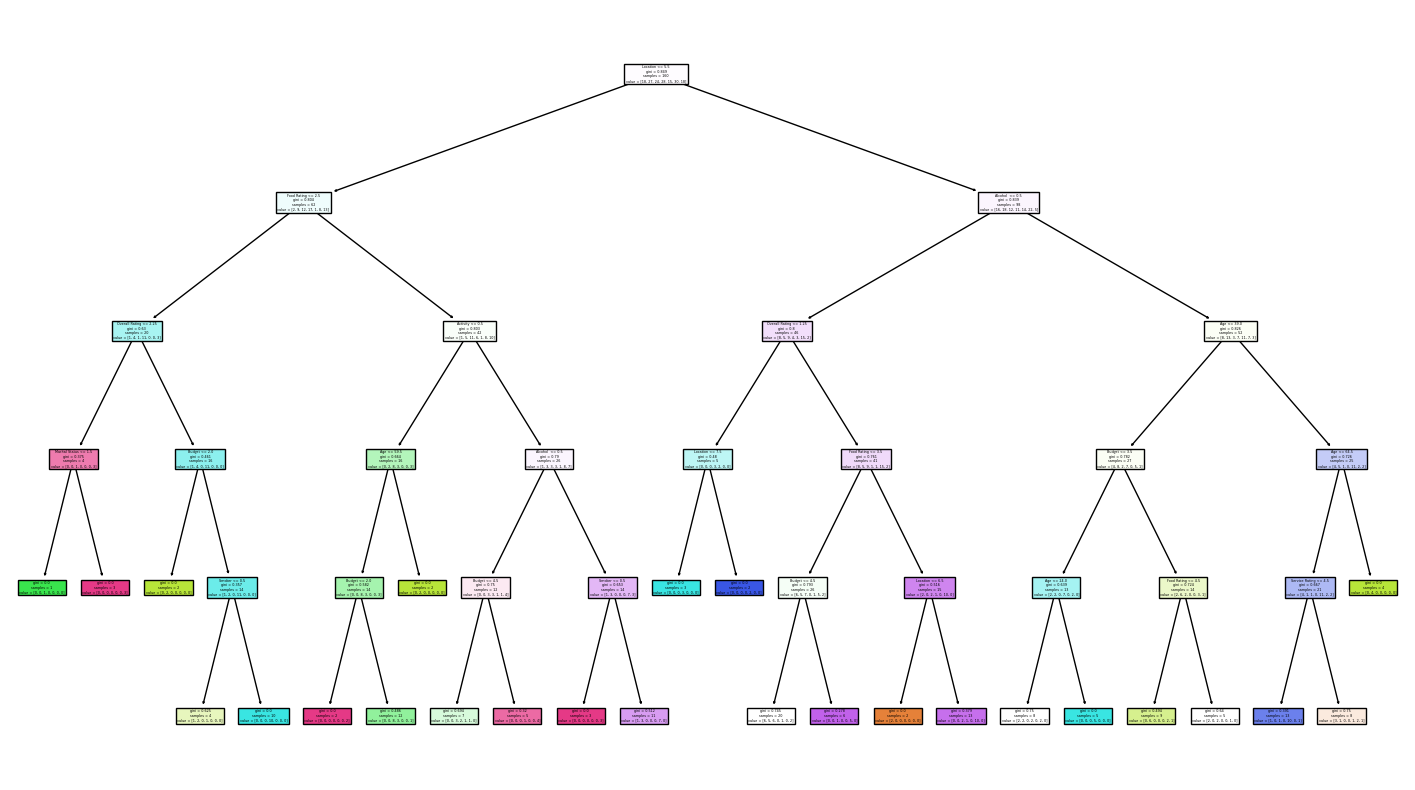

In [24]:
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=X_train.columns,filled=True)
plt.savefig("decision_tree_new.png", bbox_inches='tight')

### Feature Selection

In [25]:
!pip install mlxtend 


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


#### Forward Selection

Implementamos el uso de foward selection para nuestro trabajo.

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(DecisionTreeClassifier(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [27]:
sfs.fit(X, y)
sfs.k_feature_names_ 


('Location',
 'Gender',
 'Marital Status',
 'Budget',
 'Smoker',
 'Food Rating',
 'Service Rating',
 'Age')

##### En esta feature selection podemos ver el peso ororgado a "Location". Donde se la considera la mas importante siguiendo por genero y estado marital.

### Prediccion

In [28]:
preds = clf.predict(X_test) 
preds

array([0, 1, 0, 5, 2, 1, 0, 5, 0, 1, 6, 1, 0, 2, 0, 4, 0, 0, 1, 2, 1, 1,
       6, 1, 0, 2, 0, 2, 5, 3, 5, 5, 1, 3, 0, 1, 5, 5, 2, 1])

### Analisis de metricas del modelo

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.27      0.50      0.35         6
           1       0.36      0.57      0.44         7
           2       0.33      0.20      0.25        10
           3       1.00      0.50      0.67         4
           4       0.00      0.00      0.00         3
           5       0.57      0.67      0.62         6
           6       1.00      0.50      0.67         4

    accuracy                           0.42        40
   macro avg       0.51      0.42      0.43        40
weighted avg       0.47      0.42      0.42        40



##### Segundo modelo

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=30,criterion='gini')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=30, random_state=0)

In [43]:
preds = clf.predict(X_test) 

In [44]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.75      0.86      0.80         7
           2       0.80      0.40      0.53        10
           3       0.60      0.75      0.67         4
           4       0.60      1.00      0.75         3
           5       0.67      1.00      0.80         6
           6       0.60      0.75      0.67         4

    accuracy                           0.70        40
   macro avg       0.72      0.75      0.70        40
weighted avg       0.75      0.70      0.68        40



##### Realizamos hipertunning.

In [47]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier()
params = {
    'n_estimators' : [30,50,100],
    'max_features': [2,4,5,6,7],
    'criterion': ['gini'], 
    'max_depth':[4,5,6,7]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  # Opciones:r2, explained_variance
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo
#Entrenamos el modelo 
grid_random_forest.fit(X_train, y_train)
grid_random_forest.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'n_estimators': 100}

##### Probamos el modelo con las variables obtenidas por hipertunning.

In [48]:

clf = RandomForestClassifier(max_depth=7, random_state=0, n_estimators=100,criterion='gini', max_features= 2)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=2, random_state=0)

In [49]:
preds = clf.predict(X_test) 

In [50]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.78      1.00      0.88         7
           2       1.00      0.40      0.57        10
           3       0.60      0.75      0.67         4
           4       0.60      1.00      0.75         3
           5       0.75      1.00      0.86         6
           6       1.00      0.75      0.86         4

    accuracy                           0.80        40
   macro avg       0.82      0.84      0.80        40
weighted avg       0.85      0.80      0.78        40



##### El modelo tiene una precisión y recall promedio del 82% y 84%, respectivamente, en la predicción de los gustos culinarios basados en la información sociocultural. La precisión ponderada es del 85%, lo que indica una mejor predicción para las clases más comunes. Sin embargo, el F1-score ponderado es del 80%, lo que muestra dificultades para equilibrar la precisión y el recall en todas las clases. Se pueden mejorar los resultados mediante la recopilación de más datos, la inclusión de características relevantes y la exploración de técnicas avanzadas de modelado y ajuste de hiperparámetros.